In [1]:
import pandas as pd
import json
import os

# Load the JSON dataset
path = "D:\Datasets\Yak_Webshop_1\json_files"
file_path = os.path.join(path, 'sample_diverse_dataset_updated.json')

# Load the dataset from the JSON file
with open(file_path,'r') as file:
    data = json.load(file)

# Convert JSON to DataFrame
df = pd.DataFrame(data['herd'])

# Display the DataFrame to understand its structure and content
df.head()  # Preview the first few rows

,name,age,health,behavior,environment,diet,social_interactions,seasonal_changes
0,Betty-1,100.0,special_health,special_behavior,forest,berries,group,winter
1,Betty-2,5.9,excellent,positive,cave,grasses,group,winter
2,Betty-3,18.2,fair,stubborn,forest,herbs,pair,spring
3,Betty-4,23.3,fair,stubborn,forest,grasses,solitary,spring
4,Betty-5,26.8,poor,negative,cave,shrubs,pair,spring


In [2]:
# get categorical and numerical columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical Features:", categorical_features)
print("\nNumerical Features:", numerical_features)

Categorical Features: ['name', 'health', 'behavior', 'environment', 'diet', 'social_interactions', 'seasonal_changes']

Numerical Features: ['age']


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "D:\Datasets\Yak_Webshop_1\json_files\sample_diverse_dataset_updated.json"
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert JSON to DataFrame
df = pd.DataFrame(data['herd'])

# Encoding categorical columns
label_encoder = LabelEncoder()
df['health'] = label_encoder.fit_transform(df['health'])
df['environment'] = label_encoder.fit_transform(df['environment'])
df['diet'] = label_encoder.fit_transform(df['diet'])
df['social_interactions'] = label_encoder.fit_transform(df['social_interactions'])
df['seasonal_changes'] = label_encoder.fit_transform(df['seasonal_changes'])

# Defining features and target variable
features = ['age', 'health', 'environment', 'diet', 'social_interactions', 'seasonal_changes']
target = 'behavior'

X = df[features]
y = df[target]

# Check distribution of target variable
print("Distribution of target variable:")
print(y.value_counts())


Distribution of target variable:
behavior
stubborn            36
playful             16
positive            15
calm                13
special_behavior    10
negative            10
Name: count, dtype: int64


In [4]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"\nF1 Score: {f1:.4f}")
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9500

F1 Score: 0.9513

Classification Report:
                  precision    recall  f1-score   support

            calm       1.00      1.00      1.00         1
        negative       0.75      1.00      0.86         3
         playful       1.00      1.00      1.00         1
        positive       1.00      1.00      1.00         2
special_behavior       1.00      0.83      0.91         6
        stubborn       1.00      1.00      1.00         7

        accuracy                           0.95        20
       macro avg       0.96      0.97      0.96        20
    weighted avg       0.96      0.95      0.95        20



Calm Behavior
- Precision: 1.00 | Recall: 1.00 | F1-Score: 1.00 | Support: 1
- Summary: Perfect precision, recall, and F1-score for "Calm" behavior, 
         but with a low support of only 1 instance.

Negative Behavior
- Precision: 0.75 | Recall: 1.00 | F1-Score: 0.86 | Support: 3
- Summary: Adequate recall with relatively lower precision for "Negative" behavior.

Playful Behavior
- Precision: 1.00 | Recall: 1.00 | F1-Score: 1.00 | Support: 1
- Summary: Perfect precision, recall, and F1-score for "Playful" behavior, but with a low support of only 1 instance.

Positive Behavior
- Precision: 1.00 | Recall: 1.00 | F1-Score: 1.00 | Support: 2
- Summary: Perfect precision, recall, and F1-score for "Positive" behavior with slightly higher support.

Special Behavior
- Precision: 1.00 | Recall: 0.83 | F1-Score: 0.91 | Support: 6
- Summary: High precision but slightly lower recall for "Special Behavior," indicating some misclassification.

Stubborn Behavior
- Precision: 1.00 | Recall: 1.00 | F1-Score: 1.00 | Support: 7
- Summary: Perfect precision, recall, and F1-score for "Stubborn" behavior with higher support.

Overall/Average
- Weighted Avg. Precision: 0.96
- Weighted Avg. Recall: 0.95
- Weighted Avg. F1-Score: 0.95
- Total Support: 20

Summary: Strong overall performance across behavior categories with high weighted average precision, 
         recall, and F1-score. The support is distributed across different categories.


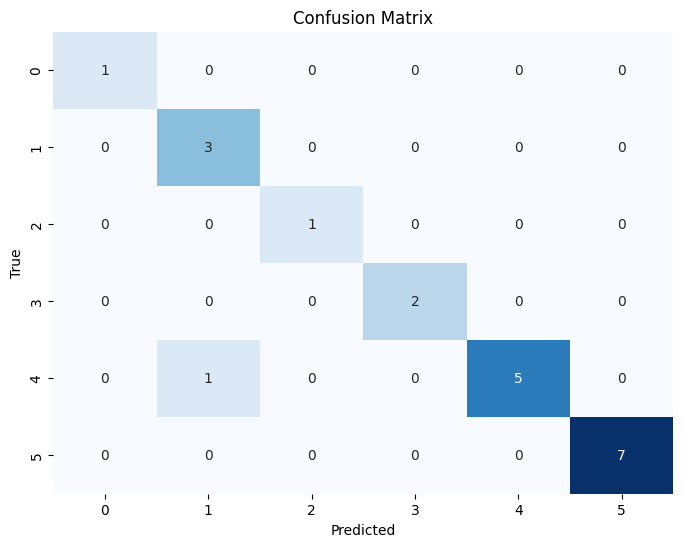

In [6]:
# Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()